<a href="https://colab.research.google.com/github/phani0011/cognifiz_internship/blob/cognifiz/Task_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Dataset .csv")

In [ ]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [ ]:
columns_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
    'Switch to order menu', 'Rating color', 'Rating text'
]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.dropna(subset=['Cuisines'], inplace=True)

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [ ]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

In [ ]:

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regressor", y_test, dt_preds)

Linear Regression Results:
Mean Squared Error (MSE): 1.5173
R² Score: 0.3374

Decision Tree Regressor Results:
Mean Squared Error (MSE): 0.1778
R² Score: 0.9224



In [ ]:
importances = dt_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

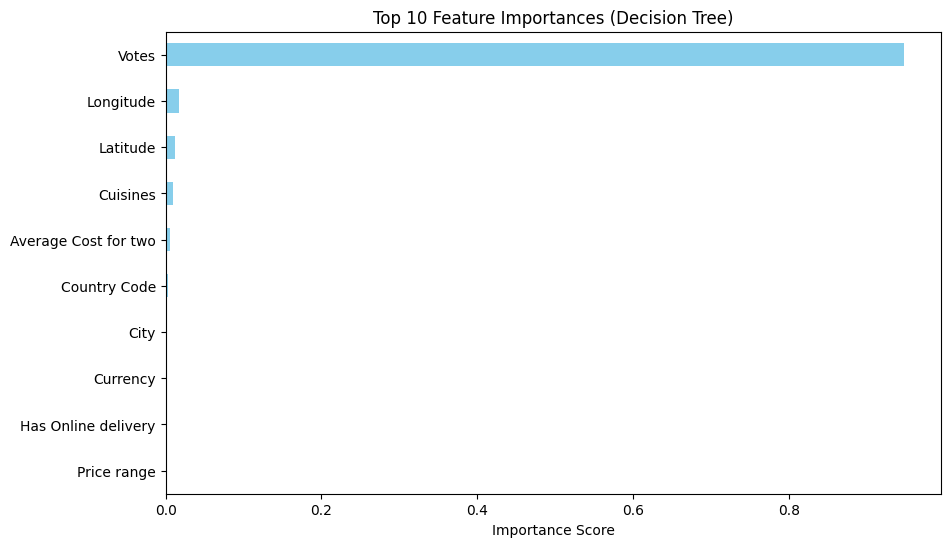

In [ ]:
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()

In [ ]:
sample_data = X_test.iloc[0:1]  # Replace with your own input data in same format as X
predicted_rating = dt_model.predict(sample_data)
print("Predicted Aggregate Rating:", predicted_rating[0])

Predicted Aggregate Rating: 0.0


In [ ]:
print("Unique aggregate ratings:", df['Aggregate rating'].unique())
print("Target value counts:\n", df['Aggregate rating'].value_counts())


Unique aggregate ratings: [4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]
Target value counts:
 Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [ ]:
predicted_ratings = dt_model.predict(X_test[:10])
print("Predicted Ratings:", predicted_ratings)
print("Actual Ratings:", y_test[:10].values)


Predicted Ratings: [0.  2.2 3.2 3.8 0.  2.8 0.  3.6 3.7 0. ]
Actual Ratings: [0.  4.1 3.3 3.9 0.  2.9 0.  4.3 3.5 0. ]


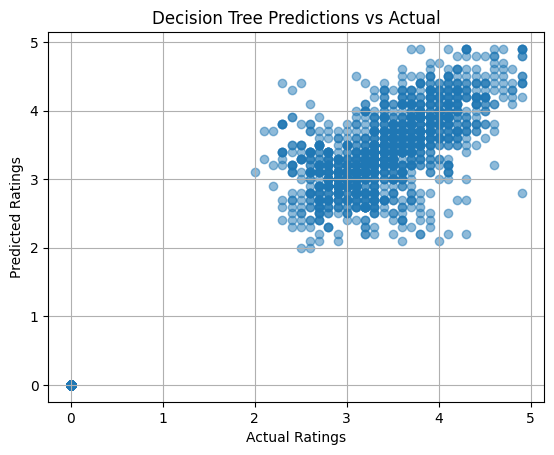

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, dt_model.predict(X_test), alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Decision Tree Predictions vs Actual")
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(X['Votes'].describe())


count     9542.000000
mean       156.772060
std        430.203324
min          0.000000
25%          5.000000
50%         31.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64


In [ ]:
df = df[(df['Votes'] > 0) & (df['Longitude'] != 0) & (df['Latitude'] != 0)]


In [ ]:
predicted_ratings = dt_model.predict(X_test[:10])
print("Predicted Ratings:", predicted_ratings)
print("Actual Ratings:", y_test[:10].values)

Predicted Ratings: [0.  2.2 3.2 3.8 0.  2.8 0.  3.6 3.7 0. ]
Actual Ratings: [0.  4.1 3.3 3.9 0.  2.9 0.  4.3 3.5 0. ]
